#Implementação e Análise do Algoritmo KNN

**Objetivo:** Implementar e avaliar o desempenho do algoritmo k-Nearest Neighbors (kNN) em um conjunto de dados real, documentando todo o processo em um relatório técnico.

**Autores:**

* Vinícius de Oliveira Souza

* Sanley Pires

## 📚 Importação das Bibliotecas

Primeiro, importamos todas as bibliotecas necessárias para nossa análise e visualização dos dados.

### Por que esses pacotes? 🤔
- **pandas 🐼:** Utilizado para manipulação e limpeza dos dados, [pandas](https://pandas.pydata.org/) oferece estruturas de dados e operações para manipular tabelas numéricas e séries temporais. É fundamental para o pré-processamento de dados em projetos de Machine Learning.
- **matplotlib 🎨:** Para visualizar dados e modelos de machine learning, usado para criar gráficos e visualizações de dados de forma estática, animada ou interativa. [matplotlib](https://matplotlib.org/) permite uma personalização extensa, essencial para a apresentação dos resultados das análises.
- **seaborn 📈:** Uma biblioteca de visualização de dados baseada no matplotlib, [seaborn](https://seaborn.pydata.org/) proporciona uma interface de alto nível para desenhos estatísticos atrativos. Ideal para criar gráficos mais complexos de forma simplificada.
- **scikit-learn 🛠️:** Para acessar algoritmos de aprendizado de máquina, [scikit-learn](https://scikit-learn.org/stable/) inclui suporte para classificação com KNeighborsClassifier e árvores de decisão com DecisionTreeClassifier. É uma das bibliotecas mais versáteis e amplamente utilizadas para modelagem preditiva.
- **numpy 🔢:** Usado para suporte de arrays e matrizes multidimensionais, [numpy](https://numpy.org/) juntamente com uma coleção de funções matemáticas para operar com estas estruturas. É a base para quase todos os cálculos numéricos em Python, especialmente em ciência de dados e machine learning.




In [2]:
# Instalação de pacotes necessários diretamente no ambiente do Colab
!pip install matplotlib scikit-learn pandas seaborn

# Importação de bibliotecas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## 📁 Carregando Dataset

A base de dados utilizada no projeto é uma base de dados do Instagram que faz análise dos dados dos maiores influenciadores da plataforma.


Disponível no kaggle em:
[Top Instagram Influencers Data](https://www.kaggle.com/datasets/surajjha101/top-instagram-influencers-data-cleaned)

In [9]:
url = 'https://drive.usercontent.google.com/u/0/uc?id=1Dnf11YkRn5l9vQ8_AjA4ddFHnnaS--i_&export=download'
dataset = pd.read_csv(url)
dataset.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


### > Explicando as variáveis

- **rank**: Rank do influenciador com base na quantidade de seguidores.
- **channel_info**: Nome de usuário do influenciador no Instagram.
- **influence_score**: Pontuação de influência dos usuários, calculada com base em menções, importância e popularidade.
- **posts**: Número de postagens feitas até o momento.
- **followers**: Quantidade de seguidores do usuário.
- **avg_likes**: Média de curtidas nas postagens do influenciador (curtidas totais/postagens totais).
- **60_day_eng_rate**: Taxa de engajamento dos últimos 60 dias do influenciador, como fração do total de engajamentos feitos até agora.
- **new_post_avg_like**: Média de curtidas em novas postagens.
- **total_likes**: Total de curtidas que o usuário recebeu em suas postagens (em bilhões).
- **country**: País ou região de origem do usuário.

### > Transformando os valores de 'country'

Para transformar a coluna `country` em faixas numéricas com base nos continentes, foi feito um mapeamento para cada país presente no dataset, associando-o a um número de acordo com o continente:

- América do Sul: 1-9
- América do Norte: 20-29
- Europa: 40-49
- Ásia: 50-59
- África: 60-69
- Oceania: 70-79


In [10]:
# Verificando os valores únicos na coluna 'country'
unique_countries = dataset['country'].unique()
unique_countries


array(['Spain', 'United States', nan, 'Canada', 'Brazil', 'Netherlands',
       'United Kingdom', 'India', 'Uruguay', 'Turkey', 'Indonesia',
       'Colombia', 'France', 'Australia', 'Italy', 'United Arab Emirates',
       'Puerto Rico', "CÃ´te d'Ivoire", 'Anguilla', 'Switzerland',
       'Sweden', 'British Virgin Islands', 'Czech Republic', 'Mexico',
       'Germany', 'Russia'], dtype=object)

In [11]:
# Criando o mapeamento de países para faixas numéricas baseadas em continentes
continent_mapping = {
    'United States': 20, 'Canada': 21, 'Puerto Rico': 22, 'Mexico': 23,
    'Brazil': 1, 'Colombia': 2, 'Uruguay': 3,
    'Spain': 40, 'Netherlands': 41, 'United Kingdom': 42, 'France': 43,
    'Italy': 44, 'Switzerland': 45, 'Sweden': 46, 'Czech Republic': 47,
    'Germany': 48, 'Russia': 49,
    'India': 50, 'Turkey': 51, 'United Arab Emirates': 52,
    'Australia': 70,
    "CÃ´te d'Ivoire": 60,
    'Anguilla': None, 'British Virgin Islands': None  # Países que não se encaixam claramente em um continente principal
}

# Aplicando o mapeamento na coluna 'country'
dataset['continent_code'] = dataset['country'].map(continent_mapping)

# Exibindo as primeiras linhas para verificar a transformação
dataset[['country', 'continent_code']].head(10)


,country,continent_code
0,Spain,40.0
1,United States,20.0
2,NaN,NaN
3,United States,20.0
4,United States,20.0
5,United States,20.0
6,United States,20.0
7,United States,20.0
8,United States,20.0
9,Canada,21.0


A coluna `country` foi transformada em uma nova coluna `continent_code`, onde cada país agora possui um código numérico baseado no continente correspondente. Os países que não se encaixam em uma faixa específica ou que não tinham uma classificação clara ficaram com valor `NaN`.


- América do Norte (20-29): United States (20), Canada (21), Puerto Rico (22), Mexico (23)
- América do Sul (1-9): Brazil (1), Colombia (2), Uruguay (3)
- Europa (40-49): Spain (40), Netherlands (41), United Kingdom (42), France (43), Italy (44), Switzerland (45), Sweden (46), Czech Republic (47), Germany (48), Russia (49)
- Ásia (50-59): India (50), Turkey (51), United Arab Emirates (52)
- Oceania (70-79): Australia (70)
- África (60-69): "Côte d'Ivoire" (60)

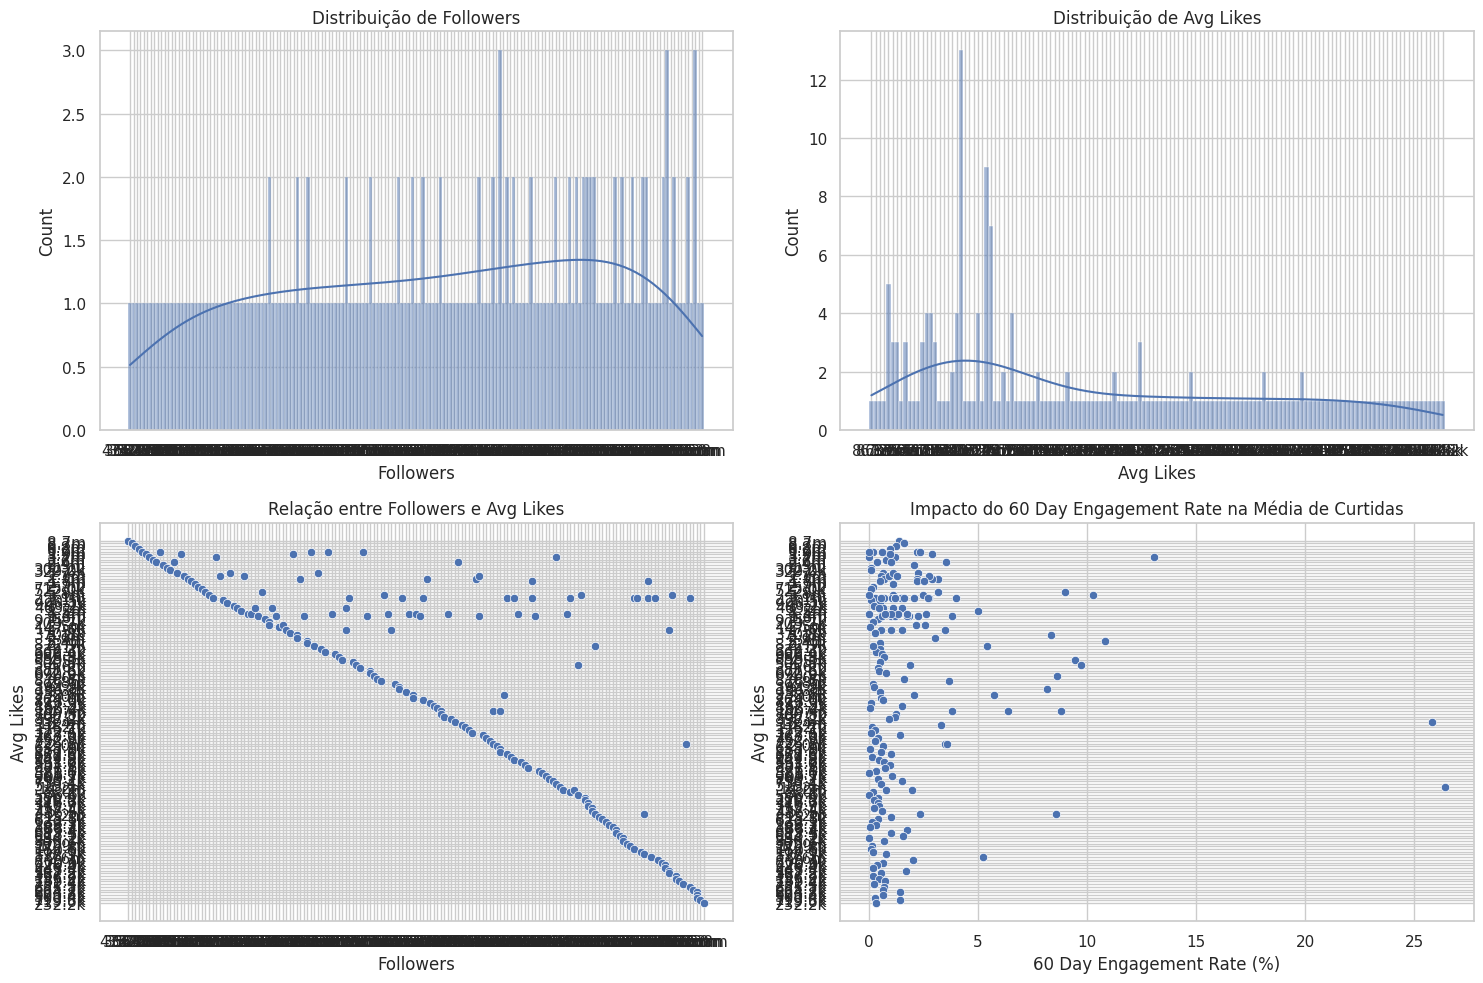

In [12]:
# Ajustando o estilo dos gráficos
sns.set(style="whitegrid")

# Explorando a distribuição de variáveis principais
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribuição de Followers
sns.histplot(dataset['followers'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribuição de Followers')
axes[0, 0].set_xlabel('Followers')

# Distribuição de Avg Likes
sns.histplot(dataset['avg_likes'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribuição de Avg Likes')
axes[0, 1].set_xlabel('Avg Likes')

# Scatter plot entre Followers e Avg Likes
sns.scatterplot(x=dataset['followers'], y=dataset['avg_likes'], ax=axes[1, 0])
axes[1, 0].set_title('Relação entre Followers e Avg Likes')
axes[1, 0].set_xlabel('Followers')
axes[1, 0].set_ylabel('Avg Likes')

# Relação entre 60_day_eng_rate e avg_likes
sns.scatterplot(x=dataset['60_day_eng_rate'].str.rstrip('%').astype(float), y=dataset['avg_likes'], ax=axes[1, 1])
axes[1, 1].set_title('Impacto do 60 Day Engagement Rate na Média de Curtidas')
axes[1, 1].set_xlabel('60 Day Engagement Rate (%)')
axes[1, 1].set_ylabel('Avg Likes')

plt.tight_layout()
plt.show()
